In [1]:
pip install numpy==1.22.0 --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score
import warnings
warnings.filterwarnings("ignore")

c:\Users\yashv\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
training_ds,validation_ds = tf.keras.utils.image_dataset_from_directory("C:\Users\acer\Downloads\fire_rover (1)\fire_rover\Fire_Detection_CNN Model\Training and Validation",                                                   
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (120, 120),
    validation_split = 0.2,
    subset = "both",
    shuffle = True,                                                                  
    seed = 10)

Found 1832 files belonging to 2 classes.
Using 1466 files for training.
Using 366 files for validation.


In [4]:
testing_ds = tf.keras.utils.image_dataset_from_directory("C:\Users\acer\Downloads\fire_rover (1)\fire_rover\Fire_Detection_CNN Model\Testing",
    labels="inferred",
    label_mode = "int",                                                 
    batch_size = 1,
    image_size = (120, 120),
    shuffle  = False                                            
    )

Found 68 files belonging to 2 classes.


In [5]:
count_fire_length = 0
count_nofire_length = 0
count_classes = {"total_fire_images":0, "total_nofire_images":0}
for img, labels in training_ds:
    for label in labels:
        if label==0:
            count_classes["total_fire_images"]+=1
        else:
            count_classes["total_nofire_images"]+=1
print(count_classes)
        

{'total_fire_images': 737, 'total_nofire_images': 729}


Above we can see that the ratio of images for fire and nofire is almost equal, we can say that this is balanced dataset. 

In [6]:
training_ds.class_names

['fire', 'nofire']

In [7]:
validation_ds.class_names

['fire', 'nofire']

In [8]:
testing_ds.class_names

['fire', 'nofire']

In [9]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_ds = training_ds.map(process)
validation_ds = validation_ds.map(process)
testing_ds = testing_ds.map(process)

In [10]:
model = Sequential()

In [11]:
# First Conv2D layer
model.add(Conv2D(100, kernel_size=(3, 3), strides=1, padding="same", activation="relu", input_shape=(120, 120, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # Default strides for pooling

# Second Conv2D layer
model.add(Conv2D(50, kernel_size=(3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # Default strides for pooling

# Flatten the output for Dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="relu"))  # If multi-class classification, change activation to "softmax"

# Output layer for binary classification
model.add(Dense(1, activation="sigmoid"))  # If multi-class, change 1 to number of classes and use "softmax"

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [13]:
history = model.fit(training_ds, batch_size = 32, validation_data = validation_ds, epochs = 50)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 705ms/step - accuracy: 0.8592 - loss: 0.7471 - val_accuracy: 0.5574 - val_loss: 0.4965
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 702ms/step - accuracy: 0.9220 - loss: 0.2922 - val_accuracy: 0.8579 - val_loss: 0.3753
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 722ms/step - accuracy: 0.9593 - loss: 0.1493 - val_accuracy: 0.8361 - val_loss: 0.5436
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 755ms/step - accuracy: 0.9605 - loss: 0.1053 - val_accuracy: 0.6995 - val_loss: 1.8425
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.9552 - loss: 0.1415 - val_accuracy: 0.6612 - val_loss: 0.5756
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 713ms/step - accuracy: 0.9621 - loss: 0.0657 - val_accuracy: 0.5437 - val_loss: 0.9435
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 722ms/step - accuracy: 0.9685 - loss: 0.0623 - val_accuracy: 0.6475 - val_loss: 0.7808
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 740ms/step - accuracy: 0.9700 - loss: 0.0654 - val_accu

In [14]:
# Save the trained model
model.save('fire_detection_model.h5')

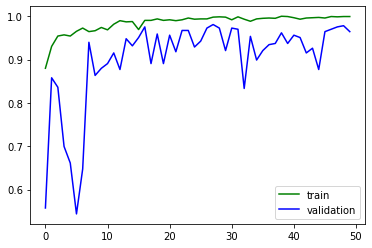

In [15]:
plt.plot(history.history["accuracy"], color = "green", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

In [21]:
y_pred = np.round(model.predict(testing_ds))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
y_test = []
for image, label in testing_ds:
    y_test.append(label)

In [23]:
y_test = np.array(y_test, dtype=np.float32)

In [19]:
print("Accuracy is ", accuracy_score(y_test, y_pred),"\n")
print("Precision is ", precision_score(y_test, y_pred),"\n")
print("Confusion is ", confusion_matrix(y_test, y_pred),"\n")

Accuracy is  0.9264705882352942 

Precision is  1.0 

Confusion is  [[22  0]
 [ 5 41]] 



Here, I am going to use external image that is downloaded from the internet.and check whether my model can predict it well or not.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Fire


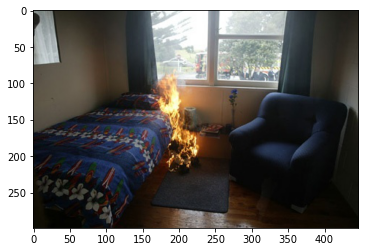

In [20]:
label = {0:"Fire",1: "No fire"}
img_path = "C:\Users\acer\Downloads\fire_rover (1)\fire_rover\Fire_Detection_CNN Model\Training and Validation\FIR_LKC_ART_01_Detectingfire_bedroomfire.jpg"
img_array = plt.imread(img_path)
resize_img = tf.keras.preprocessing.image.smart_resize(img_array, (120, 120))
reshape_img = np.expand_dims(resize_img, axis = 0)
result = model.predict(reshape_img)
result = int(result.flatten().tolist()[0])
print(label[result])
plt.imshow(img_array)

From above we can easily say that our model is a generalized model, however, we can also add more optimization technique to make our model more generalized whether it is about less training time or overcome from overfitting:

